In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize, binarize

In [16]:
r_df = pd.read_csv("/Users/tural/Datasets/ml-100k/u.data", sep='\t', names=["uid", "iid", "rating", "dt"])
r_df.head()

,uid,iid,rating,dt
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [17]:
print("Ratings:", r_df.shape[0])
print("Items:", r_df.iid.unique().size)
print("Users:", r_df.uid.unique().size)
print("Min iid:", r_df.iid.min())
print("Min uid:", r_df.uid.min())

Ratings: 100000
Items: 1682
Users: 943
Min iid: 1
Min uid: 1


In [18]:
r_df.uid -= 1
r_df.iid -= 1
print("Min iid:", r_df.iid.min())
print("Min uid:", r_df.uid.min())

Min iid: 0
Min uid: 0


In [19]:
r_df = r_df.sort_values(["uid", "dt"])
r_df.head()

,uid,iid,rating,dt
59972,0,167,5,874965478
92487,0,171,5,874965478
74577,0,164,5,874965518
48214,0,155,4,874965556
15764,0,195,5,874965677


## Строим матрицу переходов

In [37]:
n_items = r_df.iid.unique().size
tm = np.zeros((n_items, n_items))
prev_uid = prev_iid = None

for t in r_df.itertuples():
    if t.uid == prev_uid and prev_iid is not None:
        tm[prev_iid, t.iid] += 1

    prev_uid = t.uid
    prev_iid = t.iid

## Порисуем

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

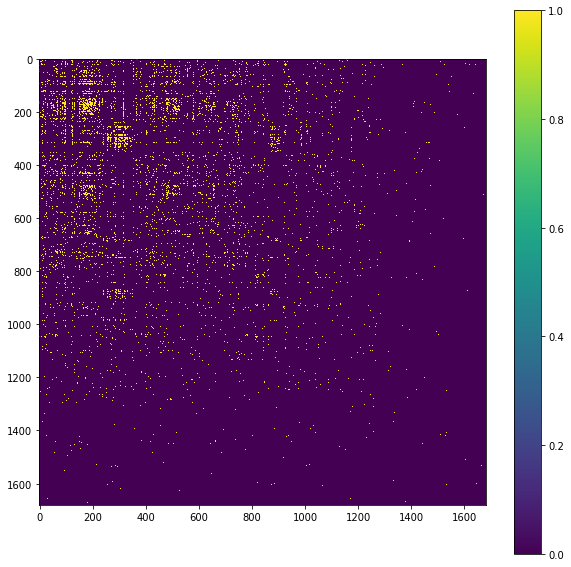

In [39]:
plt.figure(figsize=(10, 10))
plt.imshow(binarize(tm))
plt.colorbar()

## Предсказание (Laplacian smoothing)

In [45]:
p_200_after_100 = (tm[100, 200] + 1) / (tm[100].sum() + tm.shape[0])
p_200_after_100

0.00057045065601825438

In [46]:
p_200_after_30 = (tm[30, 200] + 1) / (tm[30].sum() + tm.shape[0])
p_200_after_30

0.0010905125408942203